<a href="https://colab.research.google.com/github/Kushal11608202/M.tech_AI_and_ML/blob/main/CA_3_SCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Training data
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')

# Test data (scale to be in [0,1]) or normalizing data
test_data=pd.read_csv('/content/drive/MyDrive/test.csv')/255

# Dimensions of train and test data
print('Training dataframe dimensions:',train_data.shape)
print('Test dataframe dimensions:',test_data.shape)

train_data.head()

Training dataframe dimensions: (42000, 785)
Test dataframe dimensions: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Missing values values
print('Number of null values in training data:',train_data.isnull().sum().sum())
print('Number of null values in testing data:',test_data.isnull().sum().sum())

Number of null values in training data: 0
Number of null values in testing data: 0


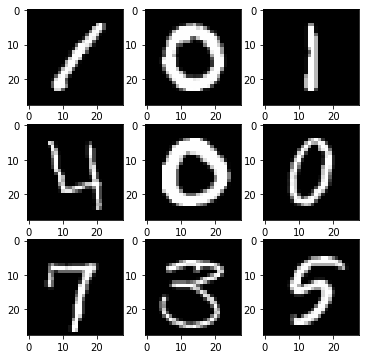

In [5]:
# Figure size
plt.figure(figsize=(6,6))

# plotting the first 9 images
for i in range(9):
    img = np.asarray(train_data.iloc[i,1:].values.reshape((28,28))/255); # making 
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

Text(0.5, 1.0, 'Distribution of labels in training set')

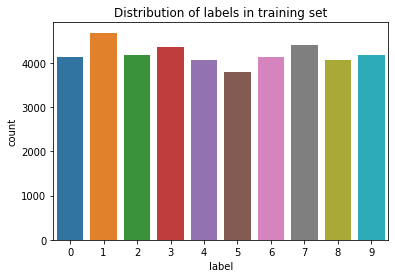

In [6]:
sns.countplot(x='label', data=train_data)
plt.title('Distribution of labels in training set')

In [7]:
# Labels
y=train_data.label

# One-hot encoding
y=pd.get_dummies(y)

# Scale features to be in [0,1]
X=train_data.drop('label', axis=1)/255

# Delete to save memory
del train_data

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.9, test_size=0.1, random_state=0, stratify=y)

In [9]:
# Reshape (-1 means unspecified)
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_valid = X_valid.values.reshape(-1, 28, 28, 1)

# Saving the image id to test_index instance for our output
test_index = test_data.index  

# Reshape
test_data = test_data.values.reshape(-1, 28, 28, 1)

In [10]:
# Setting up the CNN Model

model = Sequential()


# Convolution layer 1 -> Pooling layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Convolution layer 2 -> Pooling layer 2
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Hidden Layer
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

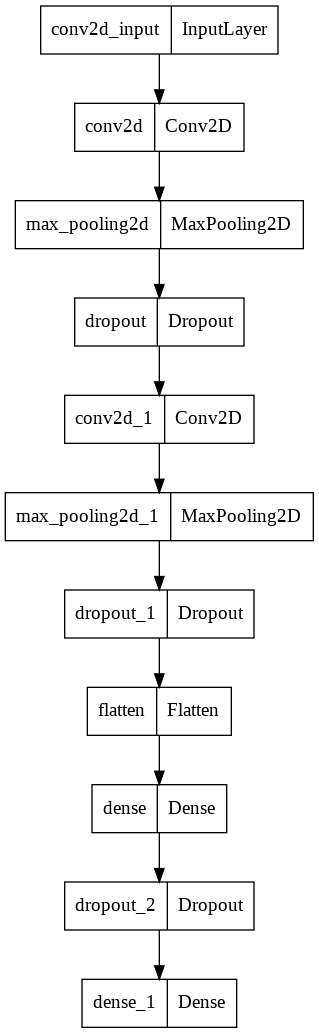

In [12]:
plot_model(model, to_file='md.png')

In [13]:
# Defining optimizer, loss function and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [14]:
# Train model
I = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1, batch_size = 85)

445/445 [==============================] - 59s 130ms/step - loss: 0.3138 - categorical_accuracy: 0.9007 - val_loss: 0.0753 - val_categorical_accuracy: 0.9762


In [15]:
preds = model.predict(test_data)

# Choosing most likely class
pred_classes = np.argmax(preds,axis=1)

# Saving Prdicted output to a data frame named output
output = pd.DataFrame({'ImageId': test_index+1,'Label': pred_classes})

# Printng first five rows of predicted output
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [16]:
output.to_csv('CNN_Output.csv', index=False)